In [21]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import opendatasets as od


od.download("https://www.kaggle.com/datasets/kazanova/sentiment140")

Skipping, found downloaded files in "./sentiment140" (use force=True to force download)


In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/sentiment140/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# replacing the '4' with '1' as positive sentiment
df["sentiment"] = df["sentiment"].replace(4,1)

In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
import nltk
from nltk.corpus import twitter_samples

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

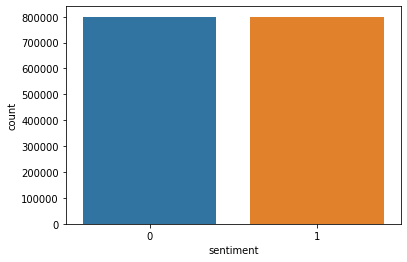

In [ ]:
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

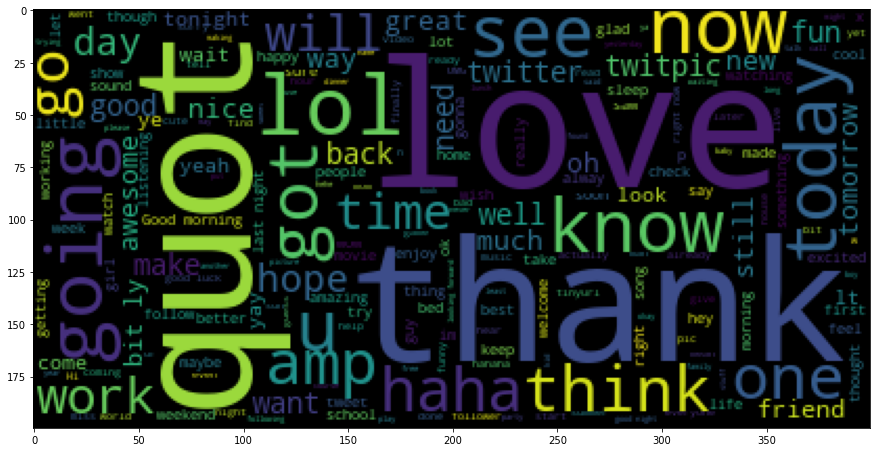

In [ ]:
#creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

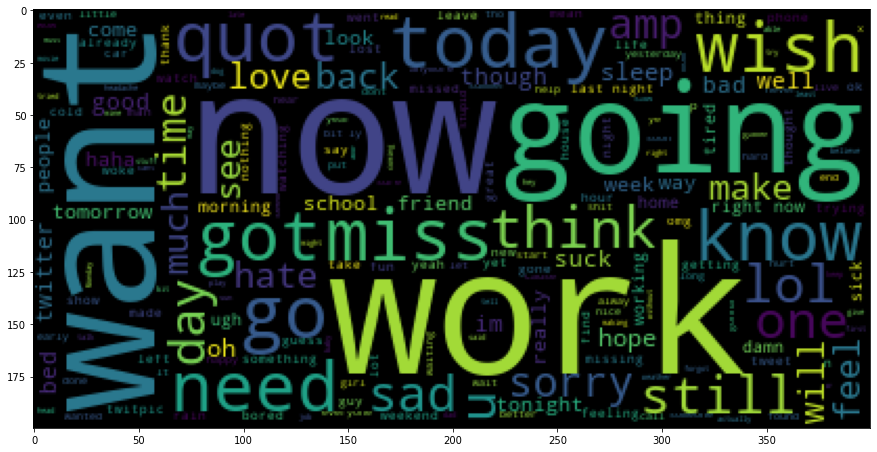

In [ ]:
# creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_nltk = set(stopwords.words('english'))
print(sw_nltk)

{'under', "should've", 'in', 'into', 've', 'needn', 'shouldn', 'once', 'they', "shan't", 'he', "that'll", 'what', 'a', 'again', "couldn't", 'not', 'most', 'if', "you'd", "hadn't", 't', 'all', 'whom', 'ours', 'there', 'how', 'more', 'after', 'ain', 'mustn', 'our', "she's", 'on', 'them', "you're", 'that', "mustn't", "won't", 'should', 'myself', 'is', 'yourself', 'her', 'his', 'be', "aren't", 'nor', 'no', 'too', 'll', "wasn't", 'was', 'do', 'which', 'don', 'does', 'their', 'why', 'ourselves', 'of', 'between', 'm', 'before', 'my', 'only', 'where', 'wouldn', 'so', 'we', 'out', 'here', 'o', 'the', 'with', 'to', 'against', 'being', "haven't", 'didn', 'other', 'him', 'shan', 'aren', 'himself', 'while', 'above', 'off', 'these', 'haven', 'you', 'weren', 'hers', 'an', 'yours', 'by', 'couldn', "wouldn't", 'such', "shouldn't", 'she', 'below', 'for', 'down', 'some', 'has', 'over', "mightn't", 'me', 'won', 'few', 'until', 'who', 'this', 'yourselves', 'd', 'doing', "you've", 'hadn', "don't", 'themselv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in sw_nltk])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset can't update Facebook texting it... migh...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times ball. Managed sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, behaving all. i'm mad. he..."


In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

1599995         Just woke up Having school best feeling ever
1599996    TheWDBcom  Very cool hear old Walt interviews ...
1599997                  Are ready MoJo Makeover Ask details
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, dtype: object

In [ ]:
df


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl Awww thats bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update Facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times ball Managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all im mad here I ...
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having school best feeling ever
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool hear old Walt interviews ...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are ready MoJo Makeover Ask details
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday boo alll time Tupac Amaru ...


In [ ]:
#removing urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

1599995         Just woke up Having school best feeling ever
1599996    TheWDBcom  Very cool hear old Walt interviews ...
1599997                  Are ready MoJo Makeover Ask details
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, dtype: object

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
# vectoriser.fit(X_train)
# print('No of feature_Words: ',len(vectoriser.get_feature_names_out()))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(df.text)

In [ ]:
vectorizer.vocabulary_


In [20]:
# Encode the Document
vector = vectorizer.transform(df.text)
# Summarizing the Encoded Texts
# print("Encoded Document is:")
# vector.toarray()

In [ ]:
DD=pd.DataFrame(vector)
DD.to_csv('data1.csv')